# Module 02 - Neural Network Classification with PyTorch

Classification is a probleam of predicting wheter something is one thing or another (tehre can be multiple options).

**Check:** https://playground.tensorflow.org/

### 1. Make Classification Data

In [848]:
# Libraries

# PyTorch
import torch
import torch.nn as nn

# SkLearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Data Manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Path
from pathlib import Path

# Seed and Device Agnostic Code
My_Seed = 42
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [849]:
# Create Data
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=My_Seed, )
print(f'{X.shape=}, {y.shape=}')

# Print 5 Samples of each
print(f'\nFirst 5 samples of X:\n{X[:5,:]}'); print(f'\nFirst 5 samples of y:\n{y[:5]}')


X.shape=(1000, 2), y.shape=(1000,)

First 5 samples of X:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 samples of y:
[1 1 1 1 0]


,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1


Text(0.5, 1.0, 'Dataset')

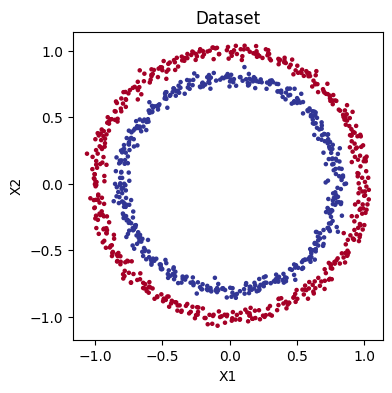

In [850]:
# Make a DataFrame of Circle Data
circles = pd.DataFrame({'X1': X[:,0], 'X2': X[:,1], 'label': y})
display(circles.head(6))

# Plot
plt.figure(figsize=(4,4))
plt.scatter(circles.X1, circles.X2, c=y, s=5, cmap=plt.cm.RdYlBu)
plt.xlabel('X1'); plt.ylabel('X2'); plt.title('Dataset')

#### 1.1. Check input & output shapes

In [851]:
X.shape, y.shape

((1000, 2), (1000,))

#### 1.2. Turn Data into tensors and Create train & test datasets

In [852]:
# Turn Data to Tensor
X = torch.Tensor(X)
y = torch.Tensor(y)

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=My_Seed)
len(X_train), len(X_test), len(y_train), len(y_test)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

### 2. Building a Model
Let's build a model to classify between our red and blue dots.

To do so, we will:
1. SetUp Device Agnostic Code (already done above).
2. Build a Model Structure
3. Create a Train/Test Loop

#### 2.1. Device Agnostic Code (DAC)

In [853]:
# 1. Setup Device Agnostic Code (DAC)
print('1. Setup Device Agnostic Code (DAC) --> Already done!')

1. Setup Device Agnostic Code (DAC) --> Already done!


#### 2.2. Build a Model Structure

In [854]:
# 2. Build a Model Structure

class Circle_Model_V0(nn.Module):

    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)
        
    def forward(self, x):
        x = self.layer_2(self.layer_1(x))
        return x

In [855]:
# Create an Instance of our Model
torch.manual_seed(My_Seed)
model_0 = Circle_Model_V0().to(device)
model_0, model_0.state_dict()

(Circle_Model_V0(
   (layer_1): Linear(in_features=2, out_features=5, bias=True)
   (layer_2): Linear(in_features=5, out_features=1, bias=True)
 ),
 OrderedDict([('layer_1.weight',
               tensor([[ 0.5406,  0.5869],
                       [-0.1657,  0.6496],
                       [-0.1549,  0.1427],
                       [-0.3443,  0.4153],
                       [ 0.6233, -0.5188]], device='cuda:0')),
              ('layer_1.bias',
               tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
              ('layer_2.weight',
               tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
              ('layer_2.bias', tensor([-0.2060], device='cuda:0'))]))

In [856]:
# Let's replicate the model above with one Sequential Layer
torch.manual_seed(My_Seed)
seq_model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

seq_model_0, seq_model_0.state_dict()

(Sequential(
   (0): Linear(in_features=2, out_features=5, bias=True)
   (1): Linear(in_features=5, out_features=1, bias=True)
 ),
 OrderedDict([('0.weight',
               tensor([[ 0.5406,  0.5869],
                       [-0.1657,  0.6496],
                       [-0.1549,  0.1427],
                       [-0.3443,  0.4153],
                       [ 0.6233, -0.5188]], device='cuda:0')),
              ('0.bias',
               tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
              ('1.weight',
               tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
              ('1.bias', tensor([-0.2060], device='cuda:0'))]))

In [857]:
# Predictions before Training
model_0.eval()
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f'Lenght of Preds: {len(untrained_preds)}')

print(f'First 10 Preds:  {untrained_preds[:10]}')
print(f'First 10 Labels: {y_test[:10]}')
print("\n---> Our predictions DON'T look anything as our labels. They must have the same nature, we'll see this below")

Lenght of Preds: 200
First 10 Preds:  tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667],
        [-0.1484],
        [-0.0826],
        [-0.0946],
        [-0.1918],
        [-0.0944]], device='cuda:0')
First 10 Labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])

---> Our predictions DON'T look anything as our labels. They must have the same nature, we'll see this below


#### 2.3. Create a Train/Test Loop

Also, we'll need a criterion and an optimizer. Which one to choose? --> Again, this is problem specific.

1. Loss Function (Criterion):
* For **Regression** we may want to use ***MAE*** (L1) or ***MSE*** (Mean Absolute Error or Mean Squared Error)
* For **Classification** we me want to use ***Binary Cross Entropy*** or ***Categorical Cross Entropy*** (cross entropy).
    * `BCEWithLogitsLoss()` --> Sigmoid Built In --> Sigmoid + BCELoss
    * `BCELoss()` --> Requires inputs to have gone through the Sigmoid Activation Function Before.

2. Optimizer: SDG or ADAM

In this case, we'll use:
* **criterion** = `torch.nn.BCEWithLogitsLoss()`
* **optimizer** = `torch.optim.SGD()`

In [858]:
# Loss Function + Optimizer + Accuracy Fn

# Loss Function + Optimizer
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1)

# Accuracy Fn
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

#### 2.4. Going from Raw Logits --> Prediction Probabilities --> Prediction Labels

We can convert **logits** into **prediction probabilities** with activation function: `Sigmoid` (Binary) or `Softmax` (Multiclass).

Then, we go from **pred_probs** to **pred_labels** by either `rounding` them or taking the `argmax()`


In [859]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device)[:5])
y_pred_probs = torch.sigmoid(y_logits)
y_preds = torch.round(y_pred_probs)

### 3. Create a Train/Test Loop

In [860]:
# My Seed
torch.manual_seed(My_Seed); torch.cuda.manual_seed(My_Seed)

# To Device
X_train = X_train.to(device); y_train = y_train.to(device)
X_test = X_test.to(device); y_test = y_test.to(device)

# Hyperparameters
epochs = 100

def train_model(model, train_data, train_labels, test_data, test_labels, criterion, optimizer, epochs):
    for epoch in range(epochs):
        # Training
        model.train()

        y_logits =  model(train_data.to(device)).squeeze()
        y_preds = torch.round(torch.sigmoid(y_logits)) # Logits -> Probs -> Labels
        loss = criterion(y_logits, train_labels.to(device)); acc = accuracy_fn(train_labels.to(device), y_preds)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Testing
        model.eval()
        with torch.inference_mode():
            test_logits = model(test_data.to(device)).squeeze()
            test_preds = torch.round(torch.sigmoid(test_logits))
            test_loss = criterion(test_logits, test_labels.to(device))
            test_acc = accuracy_fn(test_labels.to(device), test_preds)

        if (epoch % max(1, epochs // 10) == 0):
            print(f'Epoch: {epoch:5} | Train_Loss: {loss:.5f} | Train_Acc {acc:.2f}% | Test_Loss: {test_loss:.5f} | Test_Acc: {test_acc:.2f}%')
    print(f'Epoch: {epoch:5} | Train_Loss: {loss:.5f} | Train_Acc {acc:.2f}% | Test_Loss: {test_loss:.5f} | Test_Acc: {test_acc:.2f}%')
    print(f'\nModel Trained!\n\n{'-'*60}')


train_model(model_0.to(device), X_train, y_train, X_test, y_test, criterion, optimizer, epochs)

Epoch:     0 | Train_Loss: 0.69569 | Train_Acc 50.00% | Test_Loss: 0.69721 | Test_Acc: 50.00%
Epoch:    10 | Train_Loss: 0.69403 | Train_Acc 50.00% | Test_Loss: 0.69615 | Test_Acc: 50.00%
Epoch:    20 | Train_Loss: 0.69343 | Train_Acc 46.00% | Test_Loss: 0.69585 | Test_Acc: 48.50%
Epoch:    30 | Train_Loss: 0.69321 | Train_Acc 49.00% | Test_Loss: 0.69577 | Test_Acc: 47.50%
Epoch:    40 | Train_Loss: 0.69312 | Train_Acc 49.50% | Test_Loss: 0.69573 | Test_Acc: 46.50%
Epoch:    50 | Train_Loss: 0.69308 | Train_Acc 50.38% | Test_Loss: 0.69569 | Test_Acc: 46.50%
Epoch:    60 | Train_Loss: 0.69306 | Train_Acc 50.50% | Test_Loss: 0.69564 | Test_Acc: 46.50%
Epoch:    70 | Train_Loss: 0.69305 | Train_Acc 50.50% | Test_Loss: 0.69559 | Test_Acc: 46.50%
Epoch:    80 | Train_Loss: 0.69304 | Train_Acc 50.75% | Test_Loss: 0.69553 | Test_Acc: 46.50%
Epoch:    90 | Train_Loss: 0.69303 | Train_Acc 50.38% | Test_Loss: 0.69547 | Test_Acc: 46.50%
Epoch:    99 | Train_Loss: 0.69302 | Train_Acc 50.50% | Test

### 4. Make Predictions adn Evaluate the Model

From the Metrics, it looks that our model is not learning anything.

**Visualize, visualize, visualize!**

To do so, we'll import a code from the course repo. `plot_desicion_boundary.py`

In [861]:
# Import Helper Functions
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
    print('helper_functions.py already exists, skips download')

else:
    print('Downloading helper_functions.py')
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
    with open('helper_functions.py', 'wb') as f:
        f.write(request.content)


from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skips download


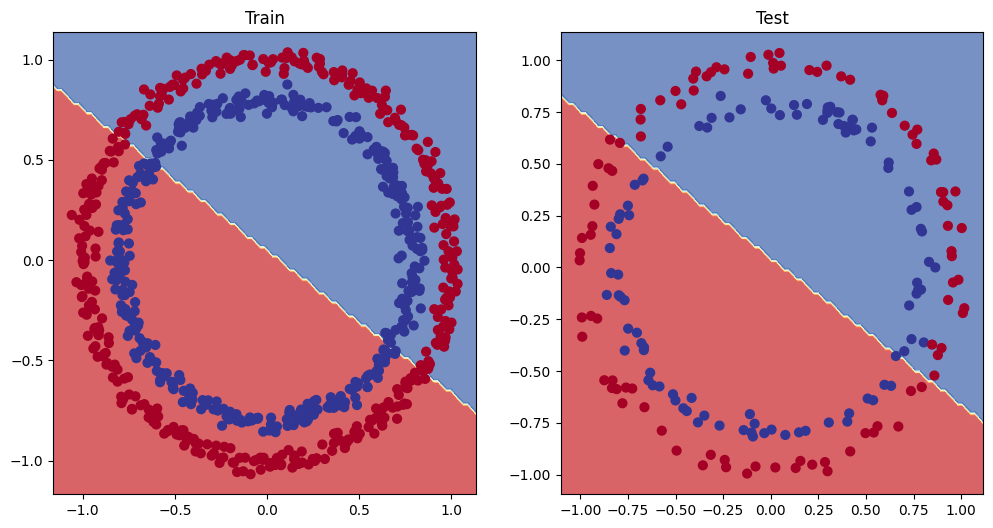

In [862]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_0, X_test, y_test)

### 5. Improve a Model (From a Model Perspective)

* **Add more Layers** - give the model more chances to learn about patterns in data.
* **Add more Hidden Units** - go from 5 hidden units to 10 hidden units.
* **Fit for Longer** - More epochs
* **Change the Learning Rate**

`HyperParameters` --> Values we as ML Engineers & Data Scientists can modify.

#### 5.1. Trial 1:
* layers: 2 --> 3
* hidden units: 5 --> 10
* epochs: 100 --> 1000

In [863]:
# Improving Model Trial 
class Circle_Model_V1(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))
    

model_1 = Circle_Model_V1().to(device)

In [864]:
# Train model_1
# Loss Function + Optimizer
criterion_1 = nn.BCEWithLogitsLoss()
optimizer_1 = torch.optim.SGD(model_1.parameters(), lr=0.1)

epochs = 1000; torch.manual_seed(My_Seed); torch.cuda.manual_seed(My_Seed)
train_model(model_1.to(device), X_train, y_train, X_test, y_test, criterion_1, optimizer_1, epochs)

Epoch:     0 | Train_Loss: 0.69396 | Train_Acc 50.88% | Test_Loss: 0.69261 | Test_Acc: 51.00%
Epoch:   100 | Train_Loss: 0.69305 | Train_Acc 50.38% | Test_Loss: 0.69379 | Test_Acc: 48.00%
Epoch:   200 | Train_Loss: 0.69299 | Train_Acc 51.12% | Test_Loss: 0.69437 | Test_Acc: 46.00%
Epoch:   300 | Train_Loss: 0.69298 | Train_Acc 51.62% | Test_Loss: 0.69458 | Test_Acc: 45.00%
Epoch:   400 | Train_Loss: 0.69298 | Train_Acc 51.12% | Test_Loss: 0.69465 | Test_Acc: 46.00%
Epoch:   500 | Train_Loss: 0.69298 | Train_Acc 51.00% | Test_Loss: 0.69467 | Test_Acc: 46.00%
Epoch:   600 | Train_Loss: 0.69298 | Train_Acc 51.00% | Test_Loss: 0.69468 | Test_Acc: 46.00%
Epoch:   700 | Train_Loss: 0.69298 | Train_Acc 51.00% | Test_Loss: 0.69468 | Test_Acc: 46.00%
Epoch:   800 | Train_Loss: 0.69298 | Train_Acc 51.00% | Test_Loss: 0.69468 | Test_Acc: 46.00%
Epoch:   900 | Train_Loss: 0.69298 | Train_Acc 51.00% | Test_Loss: 0.69468 | Test_Acc: 46.00%
Epoch:   999 | Train_Loss: 0.69298 | Train_Acc 51.00% | Test

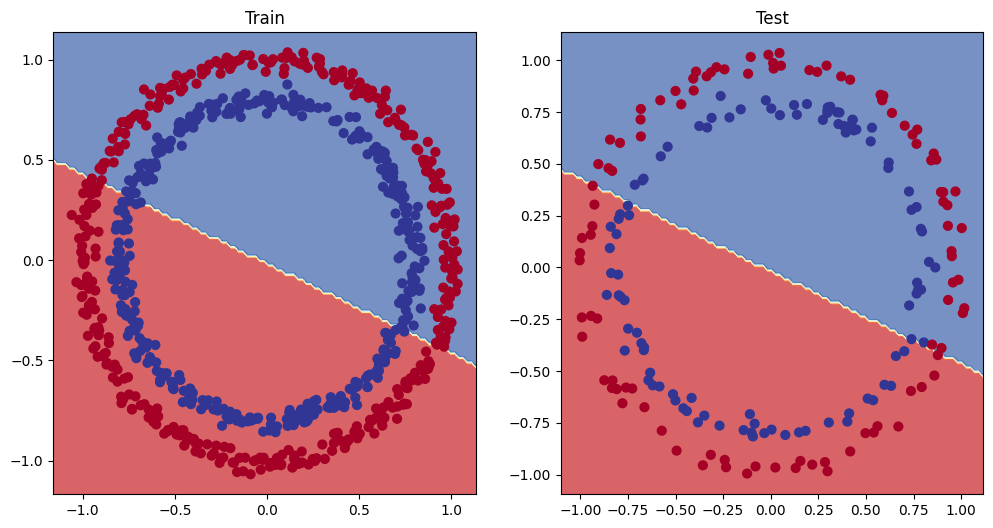

In [865]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_1, X_test, y_test)

### 6. The Missing Pieces: Non-Linearity

#### 6.1. Recreating Non-Linear Data

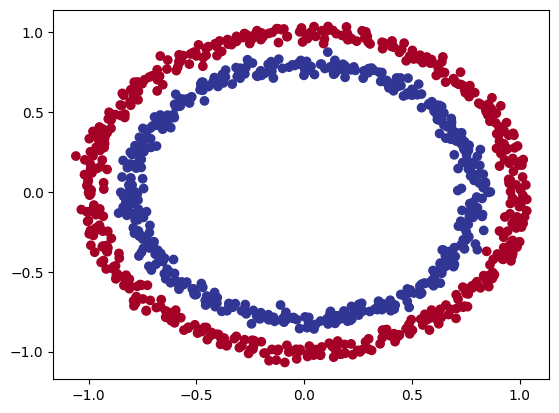

In [866]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
My_Seed = 42

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=My_Seed)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [867]:
import torch
from sklearn.model_selection import train_test_split

X = torch.Tensor(X); y = torch.Tensor(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=My_Seed)
X_train.to(device); X_test.to(device); y_train.to(device); y_test.to(device)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

#### 6.2. Building a Model with Non-Linearity

In [868]:
class Circle_Model_V2(nn.Module):
    def __init__(self):
        super().__init__()

        self.layer_1 = nn.Linear(in_features=2,  out_features=15)
        self.layer_2 = nn.Linear(in_features=15, out_features=15)
        self.layer_3 = nn.Linear(in_features=15, out_features=1)
        self.ReLU = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.ReLU(self.layer_2(self.ReLU(self.layer_1(x)))))
        
model_3 = Circle_Model_V2().to(device)
model_3

Circle_Model_V2(
  (layer_1): Linear(in_features=2, out_features=15, bias=True)
  (layer_2): Linear(in_features=15, out_features=15, bias=True)
  (layer_3): Linear(in_features=15, out_features=1, bias=True)
  (ReLU): ReLU()
)

In [869]:
criterion_3 = nn.BCEWithLogitsLoss()
optimizer_3 = torch.optim.SGD(model_3.parameters(), lr=0.1)

epochs = 1000

train_model(model_3, X_train, y_train, X_test, y_test, criterion_3, optimizer_3, epochs)


Epoch:     0 | Train_Loss: 0.69391 | Train_Acc 45.50% | Test_Loss: 0.69489 | Test_Acc: 43.50%
Epoch:   100 | Train_Loss: 0.68889 | Train_Acc 59.38% | Test_Loss: 0.69089 | Test_Acc: 58.00%
Epoch:   200 | Train_Loss: 0.68498 | Train_Acc 61.75% | Test_Loss: 0.68770 | Test_Acc: 56.50%
Epoch:   300 | Train_Loss: 0.67971 | Train_Acc 63.12% | Test_Loss: 0.68385 | Test_Acc: 57.00%
Epoch:   400 | Train_Loss: 0.67158 | Train_Acc 61.12% | Test_Loss: 0.67761 | Test_Acc: 57.00%
Epoch:   500 | Train_Loss: 0.65801 | Train_Acc 64.38% | Test_Loss: 0.66641 | Test_Acc: 60.50%
Epoch:   600 | Train_Loss: 0.63480 | Train_Acc 76.88% | Test_Loss: 0.64629 | Test_Acc: 70.00%
Epoch:   700 | Train_Loss: 0.59150 | Train_Acc 93.25% | Test_Loss: 0.60762 | Test_Acc: 90.00%
Epoch:   800 | Train_Loss: 0.51522 | Train_Acc 98.00% | Test_Loss: 0.53931 | Test_Acc: 97.00%
Epoch:   900 | Train_Loss: 0.39887 | Train_Acc 99.00% | Test_Loss: 0.43471 | Test_Acc: 97.50%
Epoch:   999 | Train_Loss: 0.26770 | Train_Acc 99.75% | Test

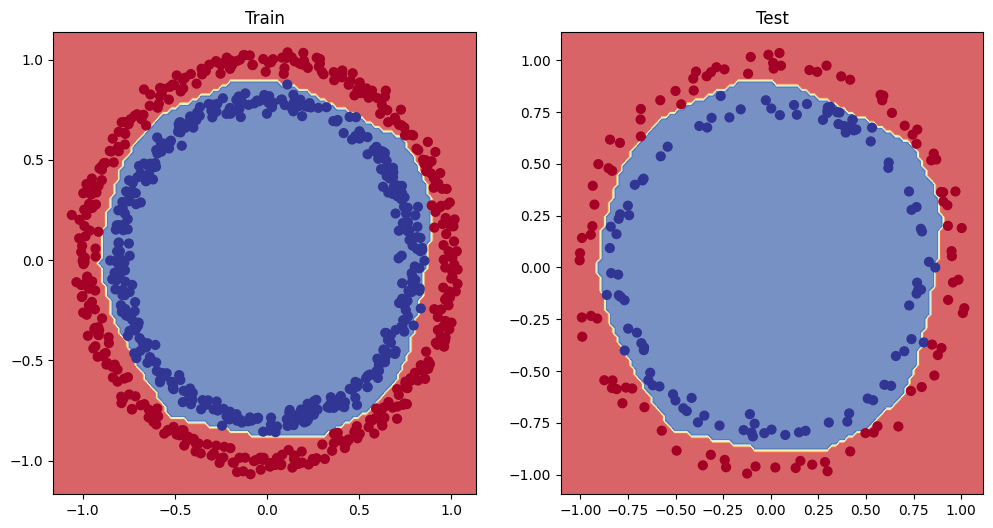

In [870]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_3, X_test, y_test)

### 7. Putting it all Together!
* **Binary Classification:** one thing or another (cat vs. dog, spam vs. not spam, fraud vs. not fraud).
* **Multiclass Classification:** more than one thing or another (cat vs. dog vs. chicken).

#### 7.1. Creating Toy Multi-Class Dataset

In [871]:
# Libraries

# PyTorch
import torch
import torch.nn as nn

# SkLearn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Data Manipulation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Path
from pathlib import Path

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3., 2., 2., 1., 1.])


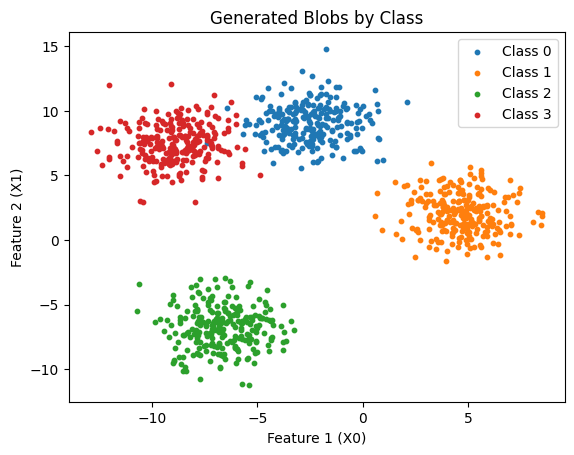

In [872]:
# Hyperparameters
MY_SEED = 42
N_SAMPLES = 1000; N_CLASSES = 4; NUM_FEATURES = 2

# Make Blobs
X_blob, y_blob = make_blobs(n_samples=N_SAMPLES, n_features=NUM_FEATURES, centers=N_CLASSES, random_state=MY_SEED,
                            cluster_std=1.5)
X_blob = torch.Tensor(X_blob); y_blob = torch.Tensor(y_blob) # Turn to Tensors

# Train-Test Slpit
X_train_blob, X_test_blob, y_train_blob, y_test_blob = train_test_split(X_blob, y_blob, test_size=0.2, random_state=MY_SEED)
X_train_blob = X_train_blob.to(device)
X_test_blob = X_test_blob.to(device)
y_train_blob = y_train_blob.to(device)
y_test_blob = y_test_blob.to(device)

# ---------------------------------------
# Printing/Plotting Multi-Class Dataset
print(X_blob[:5], y_blob[:5])
for class_idx in range(N_CLASSES):
    plt.scatter(X_blob[y_blob == class_idx, 0], X_blob[y_blob == class_idx, 1], s=10, label=f"Class {class_idx}")
plt.legend(); plt.title("Generated Blobs by Class")
plt.xlabel("Feature 1 (X0)"); plt.ylabel("Feature 2 (X1)"); plt.show()

#### 7.2. Building a Multi-Class Classification Model in PyTorch

In [ ]:
# Create the Model Structure
device = 'cuda' if torch.cuda.is_available() else 'cpu'

class BlobModel(nn.Module):

    def __init__(self, in_features, out_features, hidden_units=8):
        """Initializes multi-class classification model.
        
        Args:
            input_features (int): Number of Input Features to the Model.
            out_features (int): Number of Output Classes.
            hidden_units (int): Number of idden units between layers., default 8
            
        Returns:

        Example:        
        """
        super().__init__()

        self.linear_layer_stack  = nn.Sequential(
            nn.Linear(in_features=in_features, out_features=hidden_units),
            nn.ReLU(), 
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=out_features)
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)
    
# Create and Instance of our Blob Model
model_4 = BlobModel(in_features=2, out_features=4, hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [874]:
X_train_blob.shape, torch.unique(y_train_blob)

(torch.Size([800, 2]), tensor([0., 1., 2., 3.], device='cuda:0'))

#### 7.3. Loss Function, Optimizer

In [875]:
# Loss Function, Optimizer, Train/Test Loop
criterion_4 = nn.CrossEntropyLoss()
optimizer_4 = torch.optim.SGD(model_4.parameters(), lr=0.1)

#### 7.4. Getting Prediction Probabilities for a Multi-Class Classification PyTorch Model

In order to evaluate and train adn test our model, we need to convert the `raw_outputs` (logits) --> `prob_preds` --> `class_preds` (labels)

In [876]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_test_blob)
    y_probs = torch.softmax(y_logits, dim=1)
    y_preds = torch.argmax(y_probs, dim=1)

# y_logits[:5], y_probs[:5], y_preds[:5], y_test_blob[:5]
y_probs[:5], y_preds[:5]

(tensor([[0.2656, 0.3966, 0.1876, 0.1501],
         [0.3692, 0.0658, 0.4611, 0.1039],
         [0.1971, 0.0895, 0.1392, 0.5741],
         [0.2464, 0.3649, 0.1614, 0.2273],
         [0.3601, 0.1937, 0.3718, 0.0744]], device='cuda:0'),
 tensor([1, 2, 3, 1, 2], device='cuda:0'))

#### 7.5. Train/Test Loop

In [877]:
def train_multiclass_model(model, train_data, train_labels, test_data, test_labels, criterion, optimizer, epochs):

    for epoch in range(epochs):
        # Train
        model.train()

        output_logits = model(train_data)
        output_probs  = torch.softmax(output_logits, dim=1)
        output_preds  = torch.argmax(output_probs, dim=1)
        loss = criterion(output_logits, train_labels.long()); acc = accuracy_fn(train_labels, output_preds)
        optimizer.zero_grad()
        loss.backward()
        optimizer_4.step()

        # Test
        model.eval()
        with torch.inference_mode():
            test_output_logits = model(test_data)
            test_output_probs = torch.softmax(test_output_logits, dim=1)
            test_output_preds = torch.argmax(test_output_probs, dim=1)
            test_loss = criterion(test_output_logits, test_labels.long()); test_acc = accuracy_fn(test_labels, test_output_preds)
        
        if (epoch % max(1, epochs // 10) == 0):
            print(f'Epoch: {epoch:5} | Train_Loss: {loss:.5f} | Train_Acc: {acc:.2f}% | Test_Loss: {test_loss:.5f} | Test_Acc: {test_acc:.2f}%')
    print(f'Epoch: {epoch:5} | Train_Loss: {loss:.5f} |  Train_Acc: {acc:.2f}% | Test_Loss: {test_loss:.5f} | Test_Acc: {test_acc:.2f}%')
    print(f'Training Done!')

In [878]:
torch.manual_seed(MY_SEED); torch.cuda.manual_seed(MY_SEED)
epochs = 100
train_multiclass_model(model_4, X_train_blob, y_train_blob, X_test_blob, y_test_blob, criterion_4, optimizer_4, epochs)

Epoch:     0 | Train_Loss: 1.51860 | Train_Acc: 29.12% | Test_Loss: 0.74580 | Test_Acc: 75.50%
Epoch:    10 | Train_Loss: 0.17354 | Train_Acc: 99.12% | Test_Loss: 0.15646 | Test_Acc: 99.00%
Epoch:    20 | Train_Loss: 0.09060 | Train_Acc: 99.00% | Test_Loss: 0.08198 | Test_Acc: 99.50%
Epoch:    30 | Train_Loss: 0.06459 | Train_Acc: 99.00% | Test_Loss: 0.05681 | Test_Acc: 99.50%
Epoch:    40 | Train_Loss: 0.05253 | Train_Acc: 99.00% | Test_Loss: 0.04472 | Test_Acc: 99.50%
Epoch:    50 | Train_Loss: 0.04572 | Train_Acc: 99.00% | Test_Loss: 0.03774 | Test_Acc: 99.50%
Epoch:    60 | Train_Loss: 0.04140 | Train_Acc: 99.00% | Test_Loss: 0.03322 | Test_Acc: 99.50%
Epoch:    70 | Train_Loss: 0.03845 | Train_Acc: 99.00% | Test_Loss: 0.03008 | Test_Acc: 99.50%
Epoch:    80 | Train_Loss: 0.03631 | Train_Acc: 99.00% | Test_Loss: 0.02776 | Test_Acc: 99.50%
Epoch:    90 | Train_Loss: 0.03470 | Train_Acc: 99.00% | Test_Loss: 0.02599 | Test_Acc: 99.50%
Epoch:    99 | Train_Loss: 0.03357 |  Train_Acc: 9

#### 7.6. Evaluation (make Predictions)

In [879]:
model_4.to(device); model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_test_blob)
y_probs = torch.softmax(y_logits, dim=1)
y_preds = torch.argmax(y_probs, dim=1)

idx = 15
y_preds[:idx] == y_test_blob[:idx], torch.all(y_preds[:idx] == y_test_blob[:idx])

(tensor([True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True], device='cuda:0'),
 tensor(True, device='cuda:0'))

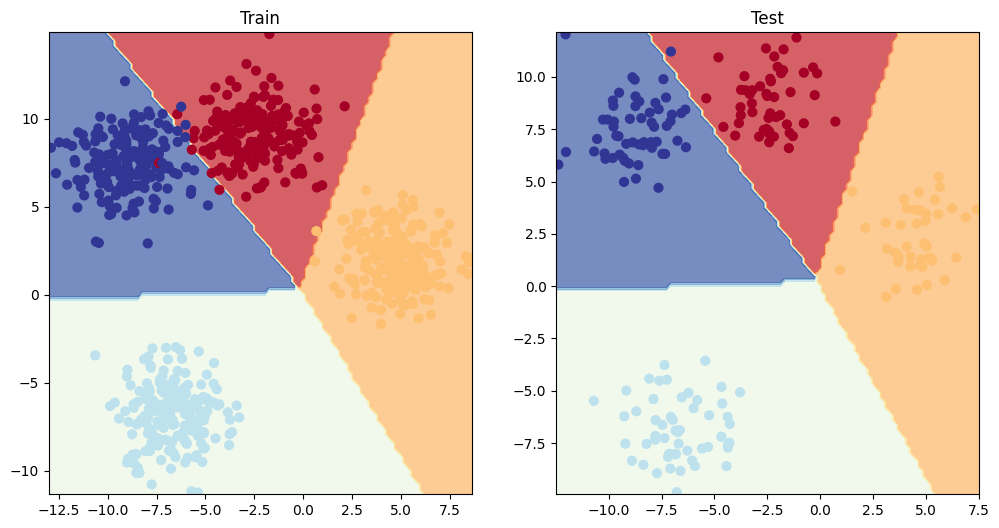

In [880]:
# Plot
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_4, X_train_blob, y_train_blob)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_4, X_test_blob, y_test_blob)